In [4]:
import pandas as pd

In [6]:
df = pd.read_excel("/Users/niniasabadze/Downloads/Assos/JPM.xlsx", skiprows=3)
df = df.iloc[1:].reset_index(drop=True)
df = df.drop(df.columns[1], axis=1)
df.head(20)

,In Millions of USD except Per Share,FY 2018,FY 2019,FY 2020,FY 2021,FY 2022,FY 2023,FY 2024,Last 12M,FY 2025 Est,FY 2026 Est
0,Net Revenue,109029,115720,119951,121649,129531,158384,177800,177800,175633.154,181750.154
1,+ Net Interest Income,55059,57245,54563,52311,66710,89267,92583,92583,NaN,NaN
2,+ Total Interest Income,77442,84040,64523,57864,92807,170588,193933,193933,NaN,NaN
3,+ Interest Income,58074,63462,46641,42622,68644,128243,142157,142157,NaN,NaN
4,+ Investment Income,19368,20578,17882,15242,24163,42345,51776,51776,NaN,NaN
5,- Total Interest Expense,22383,26795,9960,5553,26097,81321,101350,101350,NaN,NaN
6,+ Adjusted Total Non-Interest Income,53970,58475,65388,69338,62821,69117,85217,85217,NaN,NaN
7,+ Trading Securities G/L,11664,14276,18823,15959,18368,21560,24010,24010,NaN,NaN
8,+ Trading Account Profits/Losses,12059,14018,18021,16304,20748,24740,25031,25031,NaN,NaN
9,+ Investment & Loan Inc (Loss),-395,258,802,-345,-2380,-3180,-1021,-1021,NaN,NaN


In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
df_d = pd.read_excel("/Users/niniasabadze/Downloads/jpm/JPMd.xlsx", skiprows=6)
df_d.head(5)

,Date,PX_LAST,PX_BID
0,2025-02-24,262.585,262.50
1,2025-02-21,264.240,264.18
2,2025-02-20,266.800,266.86
3,2025-02-19,279.250,279.30
4,2025-02-18,279.950,279.92


<Axes: >

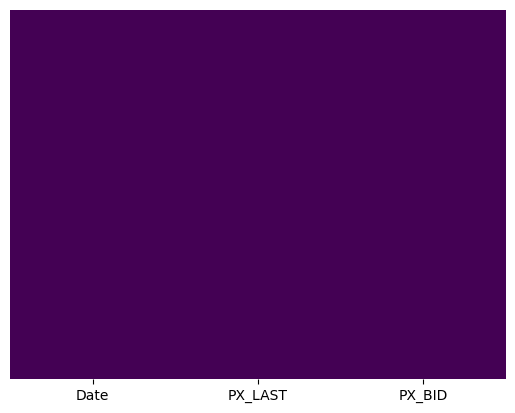

In [26]:
sns.heatmap(df_d.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [36]:
df_w = pd.read_excel("/Users/niniasabadze/Downloads/jpm/JPMw.xlsx", skiprows=6)
df_w.head(5)

,Date,PX_LAST,PX_BID
0,2025-02-21,264.24,264.18
1,2025-02-14,276.59,276.53
2,2025-02-07,275.80,275.87
3,2025-01-31,267.30,267.24
4,2025-01-24,264.84,264.79


<Axes: >

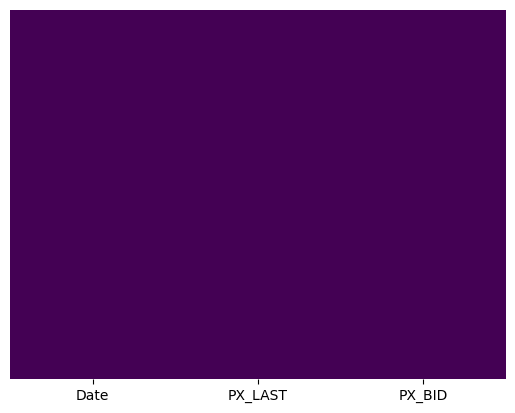

In [28]:
sns.heatmap(df_w.isnull(), yticklabels=False, cbar=False, cmap='viridis')


In [71]:
import numpy as np

In [73]:
df_w_p = pd.read_excel("/Users/niniasabadze/Downloads/jpm/jpm_w_p.xlsx", skiprows=6)
df_w_p.head(5)

,Date,PX_LAST,Change,% Change,PX_BID,Change.1,% Change.1
0,2025-02-21,264.24,-12.35,-4.465093,264.18,-12.35,-4.466062
1,2025-02-14,276.59,0.79,0.286439,276.53,0.66,0.239243
2,2025-02-07,275.80,8.50,3.179948,275.87,8.63,3.229307
3,2025-01-31,267.30,2.46,0.928863,267.24,2.45,0.925262
4,2025-01-24,264.84,5.68,2.191696,264.79,5.37,2.070002


In [75]:
missing_values=df_w_p.isna().sum()
missing_percentage = (missing_values / len(df_w_p))*100

missing_data = pd.DataFrame(
    {
        'Missing Values': missing_values,
        'Percentage': missing_percentage
    }
)
missing_data

,Missing Values,Percentage
Date,0,0.000000
PX_LAST,0,0.000000
Change,1,0.383142
% Change,1,0.383142
PX_BID,0,0.000000
Change.1,1,0.383142
% Change.1,1,0.383142


<Axes: >

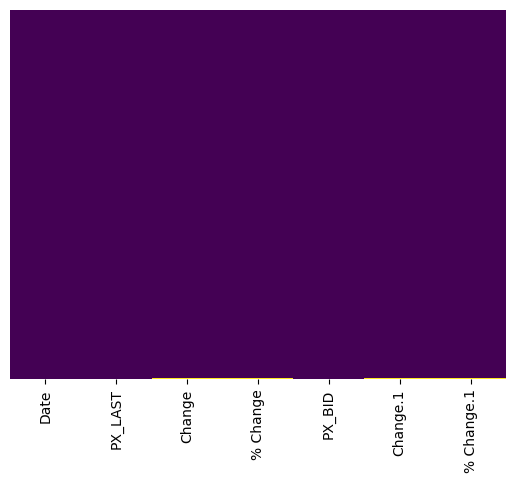

In [77]:
sns.heatmap(df_w_p.isnull(), yticklabels=False, cbar=False, cmap='viridis')

The dataset had missing values in the "Change" and "% Change" columns for both daily (df_d_p) and weekly (df_w_p) datasets. These missing values were initially represented as 0. To ensure that our analysis accurately reflects price changes, the following steps were applied:

Since a 0 value in a "Change" or "% Change" column does not logically indicate a valid price variation, all occurrences of 0 were replaced with NaN (Not a Number). This step ensures that the 0 values are correctly identified as missing rather than actual recorded values.

To fill in the missing values, linear interpolation was used. Interpolation estimates missing values based on surrounding data points.
Linear interpolation assumes a straight-line relationship between the available points, meaning that missing values are replaced with values that fit a linear trend from the previous and next valid data points. Linear interpolation is a reasonable assumption for treating the missing values, since it retains the time series structure.


In [79]:
df_w_p_before = df_w_p.copy()
df_w_p.replace(0, np.nan, inplace=True)
df_w_p.interpolate(method='linear', inplace=True)

In [81]:
df_d_p = pd.read_excel("/Users/niniasabadze/Downloads/jpm/jpm_d_p.xlsx", skiprows=6)                   
df_d_p.head(5)

,Date,PX_LAST,Change,% Change,PX_BID,Change.1,% Change.1
0,2025-02-21,264.24,-2.56,-0.959520,264.18,-2.68,-1.004272
1,2025-02-20,266.80,-12.45,-4.458371,266.86,-12.44,-4.453992
2,2025-02-19,279.25,-0.70,-0.250045,279.30,-0.62,-0.221492
3,2025-02-18,279.95,3.36,1.214794,279.92,3.39,1.225907
4,2025-02-14,276.59,0.27,0.097713,276.53,0.23,0.083243


In [83]:
missing_values=df_d_p.isna().sum()
missing_percentage = (missing_values / len(df_d_p))*100

missing_data = pd.DataFrame(
    {
        'Missing Values': missing_values,
        'Percentage': missing_percentage
    }
)
missing_data

,Missing Values,Percentage
Date,0,0.000000
PX_LAST,0,0.000000
Change,154,12.290503
% Change,154,12.290503
PX_BID,0,0.000000
Change.1,154,12.290503
% Change.1,154,12.290503


<Axes: >

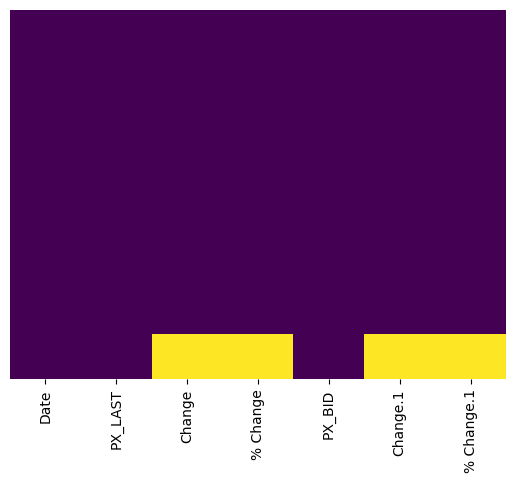

In [85]:
sns.heatmap(df_d_p.isnull(), yticklabels=False, cbar=False, cmap='viridis')


In [87]:
df_d_p_before = df_d_p.copy()
df_d_p.replace(0, np.nan, inplace=True)
df_d_p.interpolate(method='linear', inplace=True)

In [107]:
import plotly.graph_objects as go

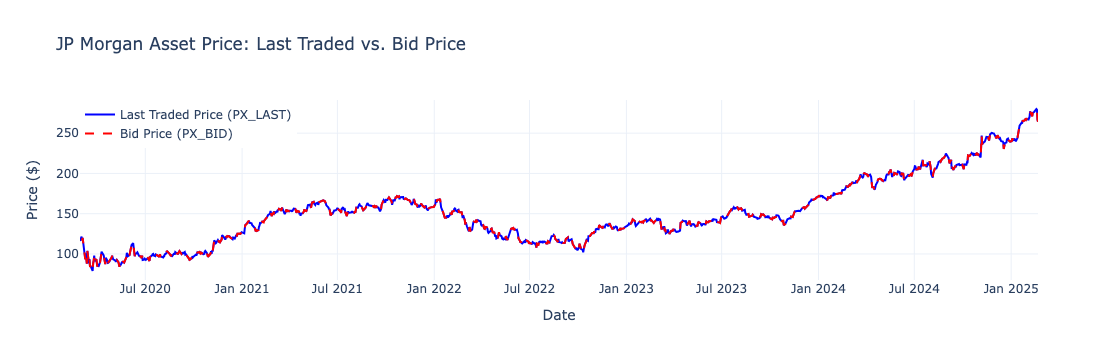

In [113]:
fig = go.Figure()
df_d_p['Date'] = pd.to_datetime(df_d_p['Date'])
# Add PX_LAST (Last Traded Price) line
fig.add_trace(go.Scatter(
    x=df_d_p["Date"], y=df_d_p["PX_LAST"],
    mode="lines", name="Last Traded Price (PX_LAST)",
    line=dict(color='blue')
))

# Add PX_BID (Bid Price) line
fig.add_trace(go.Scatter(
    x=df_d_p["Date"], y=df_d_p["PX_BID"],
    mode="lines", name="Bid Price (PX_BID)",
    line=dict(color='red', dash='dash')  # Dashed red line for bid price
))

# Customize Layout
fig.update_layout(
    title="JP Morgan Asset Price: Last Traded vs. Bid Price",
    xaxis_title="Date",
    yaxis_title="Price ($)",
    template="plotly_white",
    legend=dict(x=0, y=1)  # Position legend at the top-left
)

# Show the interactive plot
fig.show()

In [115]:
import plotly.subplots as sp

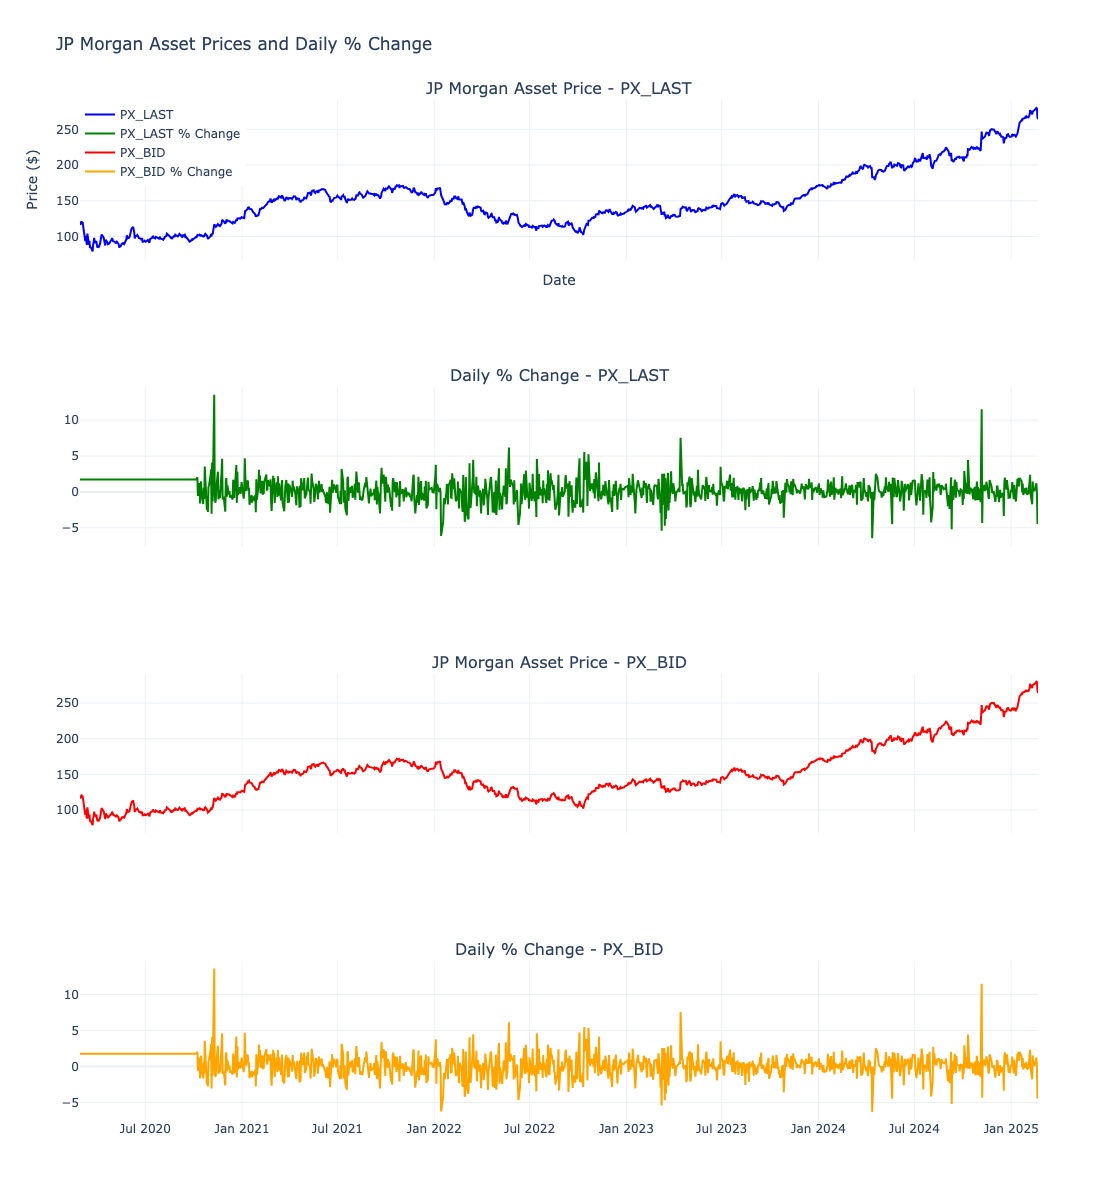

In [139]:
fig = sp.make_subplots(rows=4, cols=1, shared_xaxes=True, subplot_titles=("JP Morgan Asset Price - PX_LAST", 
        "Daily % Change - PX_LAST",
        "JP Morgan Asset Price - PX_BID",
        "Daily % Change - PX_BID"))

# PX_LAST
fig.add_trace(go.Scatter(
    x=df_d_p["Date"], 
    y=df_d_p["PX_LAST"], 
    mode="lines", 
    name="PX_LAST", 
    line=dict(color="blue")
), row=1, col=1)

fig.add_trace(go.Scatter(
    x=df_d_p["Date"], 
    y=df_d_p["% Change"],
    mode="lines", name="PX_LAST % Change",
    line=dict(color='green')
), row=2, col=1)

# PX_BID
fig.add_trace(go.Scatter(
    x=df_d_p["Date"], 
    y=df_d_p["PX_BID"], 
    mode="lines", 
    name="PX_BID", 
    line=dict(color="red")
), row=3, col=1)

fig.add_trace(go.Scatter(
    x=df_d_p["Date"], y=df_d_p["% Change.1"],
    mode="lines", name="PX_BID % Change",
    line=dict(color='orange')
), row=4, col=1)

fig.update_layout(
    title="JP Morgan Asset Prices and Daily % Change",
    xaxis_title="Date",
    height=1200,
    yaxis_title="Price ($)",
    template="plotly_white",
    legend=dict(x=0, y=1)
)
fig.show()